In [406]:
import yfinance as yf
import mplfinance as mpf

btc = yf.Ticker('BTC-USD')

btc_hist = btc.history(period='5d', interval='15m')

# drop the columns that are not needed
btc_hist.drop(columns=['Dividends', 'Stock Splits'], inplace=True)

latest = btc_hist
btc_hist

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-06-27 00:00:00+00:00,60811.226562,60818.398438,60772.582031,60810.648438,22863872
2024-06-27 00:15:00+00:00,60770.324219,60900.781250,60764.347656,60776.097656,55089152
2024-06-27 00:30:00+00:00,60798.890625,60992.089844,60798.890625,60936.820312,61745152
2024-06-27 00:45:00+00:00,60932.566406,60951.375000,60815.984375,60939.246094,50087936
2024-06-27 01:00:00+00:00,60933.503906,60980.250000,60854.238281,60959.644531,18825216
...,...,...,...,...,...
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368
2024-07-01 07:15:00+00:00,63363.128906,63363.128906,63261.433594,63261.433594,0


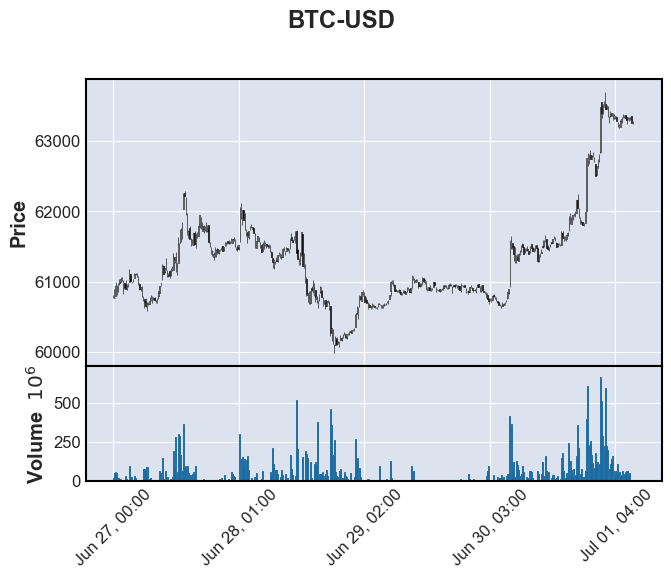

In [381]:
mpf.plot(latest[-500:], type='candle', volume=True, title='BTC-USD')

In [382]:
# compute most popular indicators using ta library.
import pandas as pd
import pandas_ta as ta

latest.set_index(pd.DatetimeIndex(latest.index), inplace=True)

# moving averages
latest.ta.sma(length=10, append=True)
latest.ta.sma(length=50, append=True)
latest.ta.sma(length=200, append=True)

# exponential moving averages
latest.ta.ema(length=10, append=True)
latest.ta.ema(length=50, append=True)
latest.ta.ema(length=200, append=True)

# RSI
latest.ta.rsi(length=14, append=True)

# MACD
latest.ta.macd(append=True)

# Bollinger Bands
latest.ta.bbands(append=True)

# ATR
latest.ta.atr(append=True)

# ADX
latest.ta.adx(append=True)

# Stochastics
latest.ta.stoch(append=True)
latest.ta.stochrsi(append=True)

latest

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-27 00:00:00+00:00,60811.226562,60818.398438,60772.582031,60810.648438,22863872,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-27 00:15:00+00:00,60770.324219,60900.781250,60764.347656,60776.097656,55089152,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-27 00:30:00+00:00,60798.890625,60992.089844,60798.890625,60936.820312,61745152,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-27 00:45:00+00:00,60932.566406,60951.375000,60815.984375,60939.246094,50087936,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-06-27 01:00:00+00:00,60933.503906,60980.250000,60854.238281,60959.644531,18825216,NaN,NaN,NaN,NaN,NaN,...,0.496761,0.748481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,0.144330,0.638898,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,0.112810,0.760355,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209
2024-07-01 07:15:00+00:00,63363.128906,63363.128906,63261.433594,63261.433594,0,63317.901563,62844.042500,61516.897109,63308.617940,62873.721437,...,0.187487,0.095556,90.477095,37.017807,30.956197,22.106251,64.462438,64.508734,30.319525,30.452322


In [383]:
dataset = latest.copy()

First row index: 2024-06-29 01:45:00+00:00


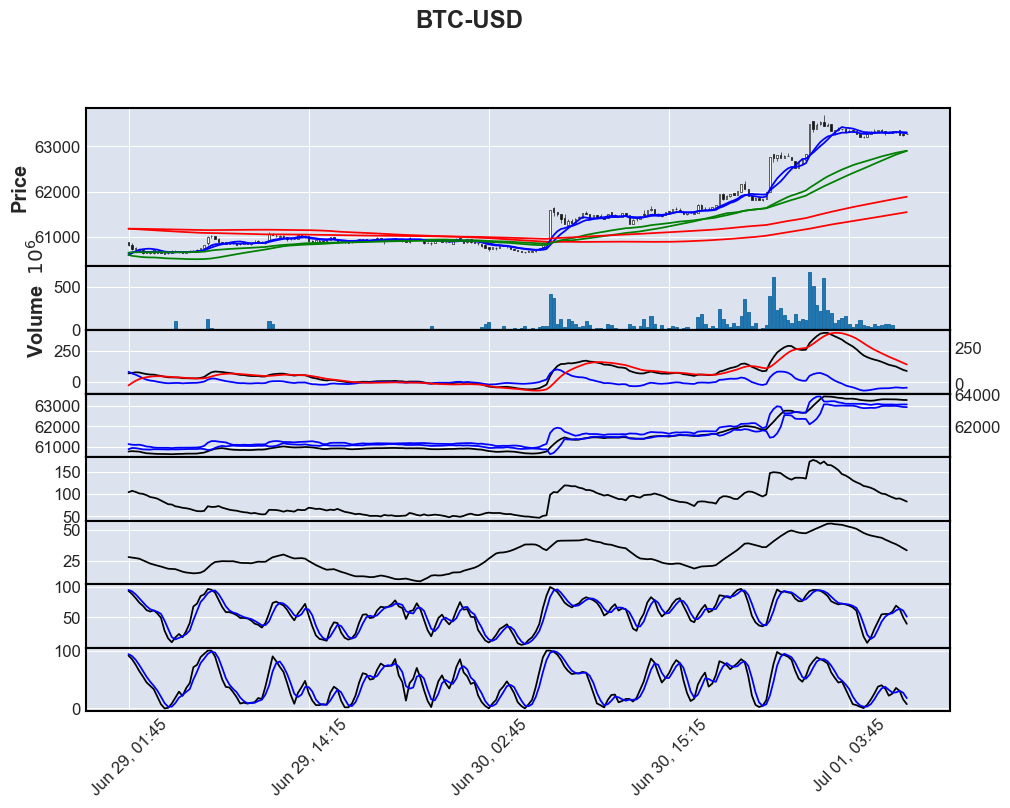

In [384]:
# find the first row index that has no NaN values. Similar to first_valid_index but return the row where all columns are not NaN
first_row = dataset.notnull().all(axis=1).idxmax()

print(f'First row index: {first_row}')

# drop the preceding rows
dataset = dataset.loc[first_row:]

to_plot = dataset[-500:]

# plot the data with the SMAs and EMAs, taking full screen width
mpf.plot(to_plot, type='candle', volume=True, title='BTC-USD', addplot=[
    mpf.make_addplot(to_plot['SMA_10'], color='blue'),
    mpf.make_addplot(to_plot['SMA_50'], color='green'),
    mpf.make_addplot(to_plot['SMA_200'], color='red'),
    mpf.make_addplot(to_plot['EMA_10'], color='blue'),
    mpf.make_addplot(to_plot['EMA_50'], color='green'),
    mpf.make_addplot(to_plot['EMA_200'], color='red'),
    mpf.make_addplot(to_plot['RSI_14'], panel=1, color='black'),
    mpf.make_addplot(to_plot['MACD_12_26_9'], panel=2, color='black'),
    mpf.make_addplot(to_plot['MACDh_12_26_9'], panel=2, color='blue'),
    mpf.make_addplot(to_plot['MACDs_12_26_9'], panel=2, color='red'),
    mpf.make_addplot(to_plot['BBM_5_2.0'], panel=3, color='black'),
    mpf.make_addplot(to_plot['BBU_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['BBL_5_2.0'], panel=3, color='blue'),
    mpf.make_addplot(to_plot['ATRr_14'], panel=4, color='black'),
    mpf.make_addplot(to_plot['ADX_14'], panel=5, color='black'),
    mpf.make_addplot(to_plot['STOCHk_14_3_3'], panel=6, color='black'),
    mpf.make_addplot(to_plot['STOCHd_14_3_3'], panel=6, color='blue'),
    mpf.make_addplot(to_plot['STOCHRSIk_14_14_3_3'], panel=7, color='black'),
    mpf.make_addplot(to_plot['STOCHRSId_14_14_3_3'], panel=7, color='blue'),
], figscale=1.5)

In [385]:
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-29 01:45:00+00:00,60873.515625,60881.703125,60797.136719,60817.953125,0,60592.200781,60594.389297,61176.236348,60636.633540,60647.539294,...,0.513815,0.642012,104.413902,28.347509,39.066220,18.239332,93.694571,95.298567,91.369495,93.986845
2024-06-29 02:00:00+00:00,60804.566406,60861.171875,60713.207031,60718.773438,0,60633.319531,60574.522656,61175.776973,60651.568067,60650.332790,...,0.328731,0.140536,107.524685,27.970186,35.226285,22.021979,88.456446,92.963868,85.021810,90.468517
2024-06-29 02:15:00+00:00,60729.417969,60778.679688,60706.128906,60752.675781,0,60676.823438,60565.024531,61175.659863,60669.951288,60654.346241,...,0.334011,0.369726,105.026548,27.542744,33.488156,21.416758,81.664053,87.938357,75.452371,83.947892
2024-06-29 02:30:00+00:00,60734.703125,60734.703125,60694.582031,60694.582031,0,60711.822266,60554.980547,61174.448672,60674.429605,60655.924115,...,0.400630,0.197359,101.674204,27.013657,32.121428,21.353888,74.376346,81.498948,64.502412,74.992198
2024-06-29 02:45:00+00:00,60697.761719,60707.804688,60619.539062,60632.953125,13453312,60722.226562,60546.460938,61172.917207,60666.888426,60655.023292,...,0.404243,0.131587,100.716448,25.698747,30.110678,25.339252,69.136721,75.059040,55.059696,65.004826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,0.144330,0.638898,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,0.112810,0.760355,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209
2024-07-01 07:15:00+00:00,63363.128906,63363.128906,63261.433594,63261.433594,0,63317.901563,62844.042500,61516.897109,63308.617940,62873.721437,...,0.187487,0.095556,90.477095,37.017807,30.956197,22.106251,64.462438,64.508734,30.319525,30.452322


In [387]:
# add a new column to the dataset that is the close value of the next row. This will be used to predict the next close value.
dataset['Next Close'] = dataset['Close'].shift(-1)
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-29 01:45:00+00:00,60873.515625,60881.703125,60797.136719,60817.953125,0,60592.200781,60594.389297,61176.236348,60636.633540,60647.539294,...,0.642012,104.413902,28.347509,39.066220,18.239332,93.694571,95.298567,91.369495,93.986845,60718.773438
2024-06-29 02:00:00+00:00,60804.566406,60861.171875,60713.207031,60718.773438,0,60633.319531,60574.522656,61175.776973,60651.568067,60650.332790,...,0.140536,107.524685,27.970186,35.226285,22.021979,88.456446,92.963868,85.021810,90.468517,60752.675781
2024-06-29 02:15:00+00:00,60729.417969,60778.679688,60706.128906,60752.675781,0,60676.823438,60565.024531,61175.659863,60669.951288,60654.346241,...,0.369726,105.026548,27.542744,33.488156,21.416758,81.664053,87.938357,75.452371,83.947892,60694.582031
2024-06-29 02:30:00+00:00,60734.703125,60734.703125,60694.582031,60694.582031,0,60711.822266,60554.980547,61174.448672,60674.429605,60655.924115,...,0.197359,101.674204,27.013657,32.121428,21.353888,74.376346,81.498948,64.502412,74.992198,60632.953125
2024-06-29 02:45:00+00:00,60697.761719,60707.804688,60619.539062,60632.953125,13453312,60722.226562,60546.460938,61172.917207,60666.888426,60655.023292,...,0.131587,100.716448,25.698747,30.110678,25.339252,69.136721,75.059040,55.059696,65.004826,60641.761719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,0.638898,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804,63341.945312
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,0.760355,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209,63261.433594
2024-07-01 07:15:00+00:00,63363.128906,63363.128906,63261.433594,63261.433594,0,63317.901563,62844.042500,61516.897109,63308.617940,62873.721437,...,0.095556,90.477095,37.017807,30.956197,22.106251,64.462438,64.508734,30.319525,30.452322,63241.750000


In [388]:
print(f'Number of NaN values in the dataset: {dataset.isnull().sum().sum()}')

# drop the last row as it has NaN values
dataset.dropna(inplace=True)

print(f'Number of NaN values in the dataset after dropping: {dataset.isnull().sum().sum()}')

dataset

Number of NaN values in the dataset: 1
Number of NaN values in the dataset after dropping: 0


,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-29 01:45:00+00:00,60873.515625,60881.703125,60797.136719,60817.953125,0,60592.200781,60594.389297,61176.236348,60636.633540,60647.539294,...,0.642012,104.413902,28.347509,39.066220,18.239332,93.694571,95.298567,91.369495,93.986845,60718.773438
2024-06-29 02:00:00+00:00,60804.566406,60861.171875,60713.207031,60718.773438,0,60633.319531,60574.522656,61175.776973,60651.568067,60650.332790,...,0.140536,107.524685,27.970186,35.226285,22.021979,88.456446,92.963868,85.021810,90.468517,60752.675781
2024-06-29 02:15:00+00:00,60729.417969,60778.679688,60706.128906,60752.675781,0,60676.823438,60565.024531,61175.659863,60669.951288,60654.346241,...,0.369726,105.026548,27.542744,33.488156,21.416758,81.664053,87.938357,75.452371,83.947892,60694.582031
2024-06-29 02:30:00+00:00,60734.703125,60734.703125,60694.582031,60694.582031,0,60711.822266,60554.980547,61174.448672,60674.429605,60655.924115,...,0.197359,101.674204,27.013657,32.121428,21.353888,74.376346,81.498948,64.502412,74.992198,60632.953125
2024-06-29 02:45:00+00:00,60697.761719,60707.804688,60619.539062,60632.953125,13453312,60722.226562,60546.460938,61172.917207,60666.888426,60655.023292,...,0.131587,100.716448,25.698747,30.110678,25.339252,69.136721,75.059040,55.059696,65.004826,60641.761719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:30:00+00:00,63306.660156,63340.894531,63296.890625,63301.035156,65079296,63292.364062,62751.071719,61477.341621,63308.277362,62817.659232,...,0.212874,96.327036,40.998418,35.827059,21.975342,55.684451,55.539713,21.991186,32.153490,63339.902344
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,0.638898,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804,63341.945312
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,0.760355,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209,63261.433594


In [389]:
# add a new column to the dataset that is the percentage change of the close value of the next row.
dataset['Expected Change'] = (dataset['Next Close'] - dataset['Close']) / dataset['Close']
dataset

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3,Next Close,Expected Change
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-29 01:45:00+00:00,60873.515625,60881.703125,60797.136719,60817.953125,0,60592.200781,60594.389297,61176.236348,60636.633540,60647.539294,...,104.413902,28.347509,39.066220,18.239332,93.694571,95.298567,91.369495,93.986845,60718.773438,-0.001631
2024-06-29 02:00:00+00:00,60804.566406,60861.171875,60713.207031,60718.773438,0,60633.319531,60574.522656,61175.776973,60651.568067,60650.332790,...,107.524685,27.970186,35.226285,22.021979,88.456446,92.963868,85.021810,90.468517,60752.675781,0.000558
2024-06-29 02:15:00+00:00,60729.417969,60778.679688,60706.128906,60752.675781,0,60676.823438,60565.024531,61175.659863,60669.951288,60654.346241,...,105.026548,27.542744,33.488156,21.416758,81.664053,87.938357,75.452371,83.947892,60694.582031,-0.000956
2024-06-29 02:30:00+00:00,60734.703125,60734.703125,60694.582031,60694.582031,0,60711.822266,60554.980547,61174.448672,60674.429605,60655.924115,...,101.674204,27.013657,32.121428,21.353888,74.376346,81.498948,64.502412,74.992198,60632.953125,-0.001015
2024-06-29 02:45:00+00:00,60697.761719,60707.804688,60619.539062,60632.953125,13453312,60722.226562,60546.460938,61172.917207,60666.888426,60655.023292,...,100.716448,25.698747,30.110678,25.339252,69.136721,75.059040,55.059696,65.004826,60641.761719,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:30:00+00:00,63306.660156,63340.894531,63296.890625,63301.035156,65079296,63292.364062,62751.071719,61477.341621,63308.277362,62817.659232,...,96.327036,40.998418,35.827059,21.975342,55.684451,55.539713,21.991186,32.153490,63339.902344,0.000614
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804,63341.945312,0.000032
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209,63261.433594,-0.001271


In [390]:
# start of the ML part
# goal is to predict the 'Expected Change' column using the other columns in the dataset (except 'Next Close' column).
# the model will perform a regression task.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# split the dataset into features and target
X = dataset.drop(columns=['Next Close', 'Expected Change'])

# target
Y = dataset['Expected Change']

In [391]:
X

,Open,High,Low,Close,Volume,SMA_10,SMA_50,SMA_200,EMA_10,EMA_50,...,BBB_5_2.0,BBP_5_2.0,ATRr_14,ADX_14,DMP_14,DMN_14,STOCHk_14_3_3,STOCHd_14_3_3,STOCHRSIk_14_14_3_3,STOCHRSId_14_14_3_3
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-06-29 01:45:00+00:00,60873.515625,60881.703125,60797.136719,60817.953125,0,60592.200781,60594.389297,61176.236348,60636.633540,60647.539294,...,0.513815,0.642012,104.413902,28.347509,39.066220,18.239332,93.694571,95.298567,91.369495,93.986845
2024-06-29 02:00:00+00:00,60804.566406,60861.171875,60713.207031,60718.773438,0,60633.319531,60574.522656,61175.776973,60651.568067,60650.332790,...,0.328731,0.140536,107.524685,27.970186,35.226285,22.021979,88.456446,92.963868,85.021810,90.468517
2024-06-29 02:15:00+00:00,60729.417969,60778.679688,60706.128906,60752.675781,0,60676.823438,60565.024531,61175.659863,60669.951288,60654.346241,...,0.334011,0.369726,105.026548,27.542744,33.488156,21.416758,81.664053,87.938357,75.452371,83.947892
2024-06-29 02:30:00+00:00,60734.703125,60734.703125,60694.582031,60694.582031,0,60711.822266,60554.980547,61174.448672,60674.429605,60655.924115,...,0.400630,0.197359,101.674204,27.013657,32.121428,21.353888,74.376346,81.498948,64.502412,74.992198
2024-06-29 02:45:00+00:00,60697.761719,60707.804688,60619.539062,60632.953125,13453312,60722.226562,60546.460938,61172.917207,60666.888426,60655.023292,...,0.404243,0.131587,100.716448,25.698747,30.110678,25.339252,69.136721,75.059040,55.059696,65.004826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-01 06:30:00+00:00,63306.660156,63340.894531,63296.890625,63301.035156,65079296,63292.364062,62751.071719,61477.341621,63308.277362,62817.659232,...,0.145083,0.212874,96.327036,40.998418,35.827059,21.975342,55.684451,55.539713,21.991186,32.153490
2024-07-01 06:45:00+00:00,63303.222656,63340.753906,63291.976562,63339.902344,52135936,63298.506641,62784.711719,61490.661289,63314.027359,62838.139354,...,0.144330,0.638898,92.930629,39.721959,34.483854,21.529162,59.593270,57.025003,25.594358,27.341804
2024-07-01 07:00:00+00:00,63339.074219,63346.433594,63299.933594,63341.945312,442368,63312.681641,62817.625156,61503.945293,63319.103350,62857.896451,...,0.112810,0.760355,89.614155,38.582380,33.658466,20.731212,69.470493,61.582738,35.443082,27.676209


In [392]:
Y

Datetime
2024-06-29 01:45:00+00:00   -0.001631
2024-06-29 02:00:00+00:00    0.000558
2024-06-29 02:15:00+00:00   -0.000956
2024-06-29 02:30:00+00:00   -0.001015
2024-06-29 02:45:00+00:00    0.000145
                               ...   
2024-07-01 06:30:00+00:00    0.000614
2024-07-01 06:45:00+00:00    0.000032
2024-07-01 07:00:00+00:00   -0.001271
2024-07-01 07:15:00+00:00   -0.000311
2024-07-01 07:30:00+00:00    0.000558
Name: Expected Change, Length: 216, dtype: float64

In [393]:
# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [394]:
from sklearn.preprocessing import StandardScaler

# scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [395]:
X_train_scaled

array([[-0.67245502, -0.69099029, -0.69050584, ..., -1.1464367 ,
        -1.44894495, -1.05977592],
       [-0.57218749, -0.61247981, -0.63302832, ...,  0.09476045,
        -0.06628999,  0.345899  ],
       [ 0.00485731,  0.04024117,  0.04270922, ...,  0.39572465,
        -1.08707841, -1.0609699 ],
       ...,
       [-0.5561309 , -0.595726  , -0.55746834, ...,  0.17299277,
         1.41099349,  0.91854669],
       [ 1.63971651,  1.54774732,  1.47763254, ...,  0.14121726,
         1.12781686,  0.07697038],
       [-0.81137321, -0.82505215, -0.82209232, ..., -1.90852481,
        -1.01744895, -1.36381458]])

In [396]:
X_test_scaled

array([[ 2.25840736,  2.15802741,  2.25509024, ...,  0.53655135,
        -1.27469211, -0.882394  ],
       [ 2.23986533,  2.14232801,  2.24453097, ...,  0.19633574,
        -0.30448821, -0.61560786],
       [ 0.10490891,  0.04879754,  0.08324571, ...,  0.27286388,
        -0.96425672, -1.15524943],
       ...,
       [ 1.57493886,  1.48448307,  1.53633004, ...,  1.52530002,
         1.37791283,  1.66694787],
       [-0.60374477,  0.13029625, -0.56946477, ...,  1.19193529,
         1.92842154,  1.94501791],
       [-0.59506641, -0.6270261 , -0.64474287, ...,  0.42451821,
         0.62555839,  1.08346753]])

In [397]:
# # create the model
# model = LinearRegression()
#
# # train the model
# model.fit(X_train_scaled, Y_train)
#
# # make predictions
# predictions = model.predict(X_test_scaled)
# predictions

In [398]:
# calculate the mean squared error
# mse = mean_squared_error(Y_test, predictions)
# print(f'Mean Squared Error: {mse}')

In [399]:
# now the same process but with a neural network (use MLPRegressor)
from sklearn.neural_network import MLPRegressor

# create the model
model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=10000, random_state=42, verbose=True, alpha=0.0001,
                     learning_rate_init=0.0001, tol=1e-5, n_iter_no_change=100,
                     validation_fraction=0.1,
                     early_stopping=True)

# train the model
model.fit(X_train_scaled, Y_train)

Iteration 1, loss = 0.02577391
Validation score: -31178.870379
Iteration 2, loss = 0.02284995
Validation score: -26936.805482
Iteration 3, loss = 0.02030166
Validation score: -23190.837980
Iteration 4, loss = 0.01808383
Validation score: -19937.070280
Iteration 5, loss = 0.01616052
Validation score: -17168.150241
Iteration 6, loss = 0.01449698
Validation score: -14845.994602
Iteration 7, loss = 0.01304868
Validation score: -12924.612730
Iteration 8, loss = 0.01176804
Validation score: -11340.883538
Iteration 9, loss = 0.01061705
Validation score: -10023.132683
Iteration 10, loss = 0.00956792
Validation score: -8932.258544
Iteration 11, loss = 0.00860562
Validation score: -8024.259574
Iteration 12, loss = 0.00771616
Validation score: -7261.068178
Iteration 13, loss = 0.00689635
Validation score: -6617.396197
Iteration 14, loss = 0.00614854
Validation score: -6070.208293
Iteration 15, loss = 0.00547295
Validation score: -5598.012986
Iteration 16, loss = 0.00487195
Validation score: -5188

/Users/yannrolland/Library/Caches/pypoetry/virtualenvs/finance-OlrSMwqA-py3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 100),
             learning_rate_init=0.0001, max_iter=10000, n_iter_no_change=100,
             random_state=42, tol=1e-05, verbose=True)

In [400]:
model.loss_curve_

[0.025773911271513003,
 0.02284995367143228,
 0.02030166494784441,
 0.018083832824233054,
 0.016160515525350104,
 0.014496981836576564,
 0.013048682435729705,
 0.011768037558542315,
 0.010617050727266923,
 0.009567917063248343,
 0.008605618599161207,
 0.007716158807456165,
 0.006896351984295597,
 0.006148540427798485,
 0.005472946875238545,
 0.004871945462947282,
 0.004346706855668779,
 0.003895305343636294,
 0.0035125071162493255,
 0.0031933296650180644,
 0.0029293616087009648,
 0.002712978013503779,
 0.002536183448435888,
 0.0023889373188556605,
 0.0022635914396471205,
 0.0021557816544086074,
 0.002061070766812413,
 0.0019774956721145933,
 0.001903895405698667,
 0.0018382495751708828,
 0.0017779917719147331,
 0.0017217399769897635,
 0.0016681580575248342,
 0.0016153889597649693,
 0.0015624145770376716,
 0.0015084393017915352,
 0.0014532402991773554,
 0.0013975063372679106,
 0.0013419172357136784,
 0.0012875159034042103,
 0.0012349943431762865,
 0.0011851192107257618,
 0.0011383095398

In [401]:
model.validation_scores_

[-31178.870378663767,
 -26936.80548215178,
 -23190.83797967174,
 -19937.07028020854,
 -17168.15024079387,
 -14845.994601520566,
 -12924.612729816543,
 -11340.883537805901,
 -10023.13268333316,
 -8932.258543930478,
 -8024.259574498571,
 -7261.068178209908,
 -6617.396196524217,
 -6070.208292656531,
 -5598.012986016601,
 -5188.614783159945,
 -4830.3897584758915,
 -4512.678245163699,
 -4226.540320894588,
 -3963.2381023077046,
 -3717.106580673361,
 -3486.010909744815,
 -3268.0944684060637,
 -3064.5618841984783,
 -2873.7566829492894,
 -2696.000116198855,
 -2534.7551520935804,
 -2391.376500215982,
 -2264.945626725415,
 -2155.8872752091133,
 -2062.730699600357,
 -1983.7815293840374,
 -1916.9354797717742,
 -1859.989635984157,
 -1810.7674031333033,
 -1768.3167026649278,
 -1732.0000479863909,
 -1701.667933147858,
 -1677.5466403035334,
 -1658.6417570531773,
 -1643.8200767371652,
 -1631.7770236334616,
 -1623.0864628661495,
 -1616.3181400753774,
 -1610.4382321558696,
 -1604.578826297137,
 -1597.5231

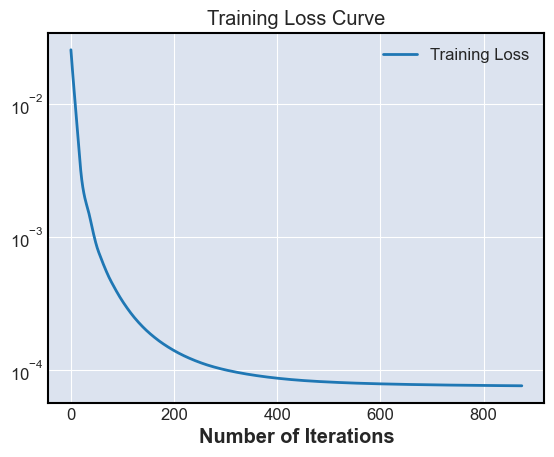

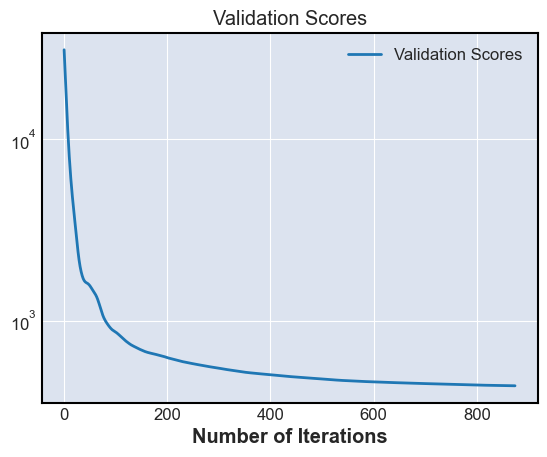

In [402]:
# plot the training loss, use log scale for y-axis
# also add the validation scores
import matplotlib.pyplot as plt

plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Training Loss Curve')

plt.plot(model.loss_curve_, label='Training Loss')
plt.legend()
plt.show()

# also plot the validation scores
plt.yscale('log')
plt.xlabel('Number of Iterations')
plt.title('Validation Scores')

# opposite the validation scores
values = [1 - x for x in model.validation_scores_]

plt.plot(values, label='Validation Scores')
plt.legend()
plt.show()

In [403]:
# make predictions
predictions = model.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')

predictions


Mean Squared Error: 0.0019372770356518043


array([ 1.80418956e-02,  9.13237547e-03,  6.38843096e-05, -2.76507364e-02,
        4.49567580e-02, -5.29512703e-02, -7.11099980e-03, -1.12484645e-02,
        6.50075942e-03,  1.95743244e-02, -6.31075931e-03,  2.02061130e-02,
       -8.73989237e-03, -1.13927694e-02, -1.63148782e-02,  2.10288673e-02,
        2.51520686e-02,  1.00036447e-02, -5.04745987e-02, -2.41362579e-02,
       -2.89777613e-02, -3.68619578e-03, -1.97882121e-02, -1.63723794e-02,
        2.01923136e-02, -9.53784967e-02, -3.10595259e-04, -1.16751243e-02,
        1.54184009e-02,  4.69806098e-03, -1.33087744e-03,  2.18392481e-02,
       -3.01363387e-02,  1.39429418e-02, -8.12120016e-03,  3.37215745e-02,
       -1.59018548e-02, -3.36055715e-02,  1.67517837e-01, -4.96339357e-03,
       -2.94665919e-03,  4.30731846e-02,  1.61522643e-01,  1.41577174e-02])

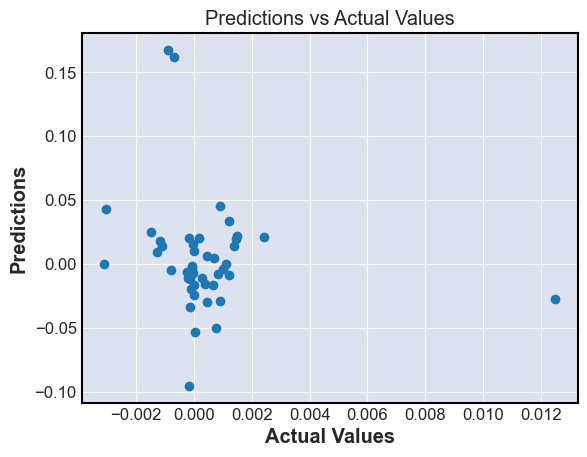

In [404]:
# plot the predictions vs the actual values as a scatter plot
import matplotlib.pyplot as plt

assert len(Y_test) == len(predictions)

plt.scatter(Y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values')
plt.show()

In [405]:
import numpy as np

# show expected and predicted values as a dataframe
df = pd.DataFrame({'Expected': Y_test, 'Predicted': predictions})

# add a percentage of error column
df['Error %'] = np.abs((df['Expected'] - df['Predicted']) / df['Expected']) * 100

# format percentage of error column
df['Error %'] = df['Error %'].map('{:.2f}%'.format)

df

,Expected,Predicted,Error %
Datetime,,,
2024-07-01 04:00:00+00:00,-0.001155,0.018042,1662.64%
2024-07-01 07:00:00+00:00,-0.001271,0.009132,818.48%
2024-06-30 12:15:00+00:00,-0.003105,0.000064,102.06%
2024-06-30 22:00:00+00:00,0.012483,-0.027651,321.51%
2024-06-29 05:30:00+00:00,0.000919,0.044957,4790.36%
2024-06-30 05:30:00+00:00,0.000039,-0.052951,134493.59%
2024-06-30 23:15:00+00:00,-0.000038,-0.007111,18487.32%
2024-06-29 20:00:00+00:00,0.000267,-0.011248,4318.80%
2024-07-01 05:00:00+00:00,0.000466,0.006501,1296.05%
